There exists an undirected tree with n nodes numbered 0 to n - 1. You are given a 0-indexed 2D integer array edges of length n - 1, where edges[i] = [ui, vi] indicates that there is an edge between nodes ui and vi in the tree. You are also given a positive integer k, and a 0-indexed array of non-negative integers nums of length n, where nums[i] represents the value of the node numbered i.

Alice wants the sum of values of tree nodes to be maximum, for which Alice can perform the following operation any number of times (including zero) on the tree:

    Choose any edge [u, v] connecting the nodes u and v, and update their values as follows:
        nums[u] = nums[u] XOR k
        nums[v] = nums[v] XOR k

Return the maximum possible sum of the values Alice can achieve by performing the operation any number of times.

 

Example 1:

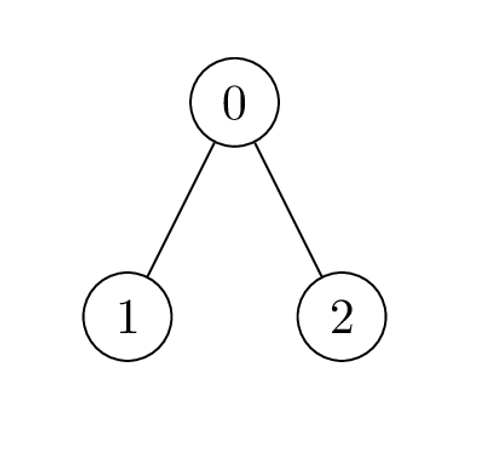

Input: nums = [1,2,1], k = 3, edges = [[0,1],[0,2]]
Output: 6
Explanation: Alice can achieve the maximum sum of 6 using a single operation:
- Choose the edge [0,2]. nums[0] and nums[2] become: 1 XOR 3 = 2, and the array nums becomes: [1,2,1] -> [2,2,2].
The total sum of values is 2 + 2 + 2 = 6.
It can be shown that 6 is the maximum achievable sum of values.

Example 2:

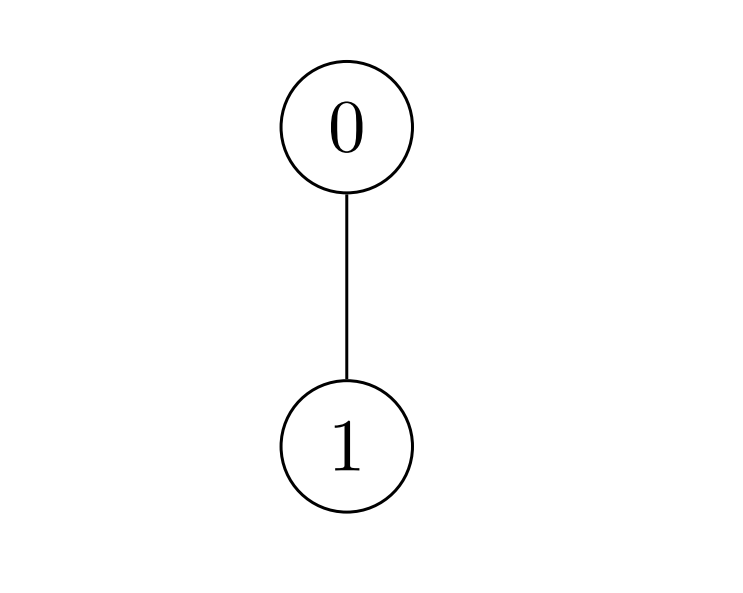

Input: nums = [2,3], k = 7, edges = [[0,1]]
Output: 9
Explanation: Alice can achieve the maximum sum of 9 using a single operation:
- Choose the edge [0,1]. nums[0] becomes: 2 XOR 7 = 5 and nums[1] become: 3 XOR 7 = 4, and the array nums becomes: [2,3] -> [5,4].
The total sum of values is 5 + 4 = 9.
It can be shown that 9 is the maximum achievable sum of values.

Example 3:

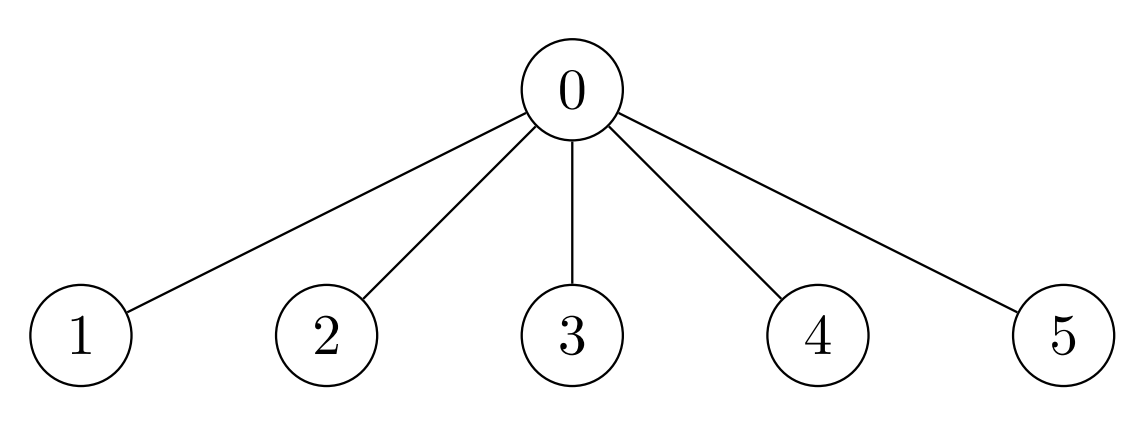

Input: nums = [7,7,7,7,7,7], k = 3, edges = [[0,1],[0,2],[0,3],[0,4],[0,5]]
Output: 42
Explanation: The maximum achievable sum is 42 which can be achieved by Alice performing no operations.

 

Constraints:

    2 <= n == nums.length <= 2 * 104
    1 <= k <= 109
    0 <= nums[i] <= 109
    edges.length == n - 1
    edges[i].length == 2
    0 <= edges[i][0], edges[i][1] <= n - 1
    The input is generated such that edges represent a valid tree.



In [ ]:
class Solution:
    def maximumValueSum(self, nums: List[int], k: int, edges: List[List[int]]) -> int:
        memo = [[-1] * 2 for _ in range(len(nums))]
        return self.maxSumOfNodes(0, 1, nums, k, memo)
    
    def maxSumOfNodes(self, index, isEven, nums, k, memo):
        if index == len(nums):
            # If the operation is performed on an odd number of elements return INT_MIN
            return 0 if isEven == 1 else -float("inf")
        if memo[index][isEven] != -1:
            return memo[index][isEven]

        # No operation performed on the element
        noXorDone = nums[index] + self.maxSumOfNodes(index + 1, isEven, nums, k, memo)
        # XOR operation is performed on the element
        xorDone = (nums[index] ^ k) + self.maxSumOfNodes(
            index + 1, isEven ^ 1, nums, k, memo
        )

        # Memoize and return the result
        memo[index][isEven] = max(xorDone, noXorDone)
        return memo[index][isEven]